### Time Series Forecasting with ARIMA

Article: [An End-to-End Project on Time Series Analysis and Forecasting with Python](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)

Dataset: [Superstore Sales](https://community.tableau.com/docs/DOC-1236)

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

#### Load data

In [3]:
df = pd.read_excel('./datasets/superstore.xls')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
furniture = df.loc[df['Category'] == 'Furniture']

In [6]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [7]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

#### Data preprocessing

Remove all the columns we do not need.

In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

In [9]:
furniture.drop(cols, axis=1, inplace=True)

In [10]:
furniture = furniture.sort_values('Order Date')

Check for missing values.

In [11]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

Aggregate sales by date.

In [12]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

Index with Time Series Data.

In [13]:
furniture = furniture.set_index('Order Date')

In [14]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Resample data to Month Start Frequency.

In [15]:
y = furniture['Sales'].resample('MS').mean()

In [16]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

#### Visualizing data

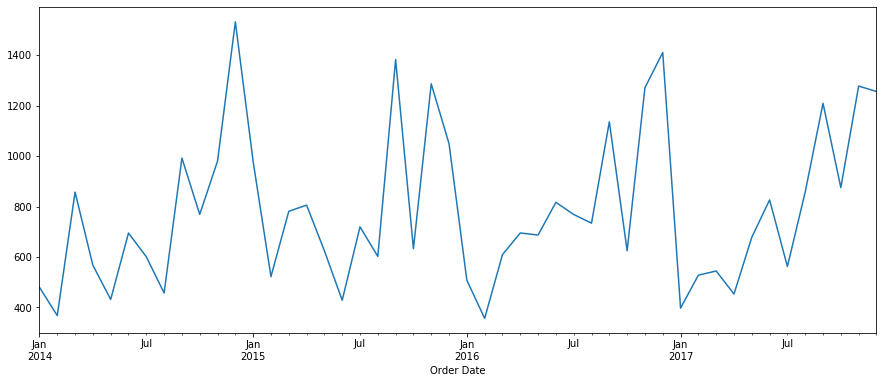

In [17]:
y.plot(figsize=(15, 6))
plt.show()

Visualize using **time-series decomposition**.

In [18]:
rcParams['figure.figsize'] = 18, 8

In [19]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

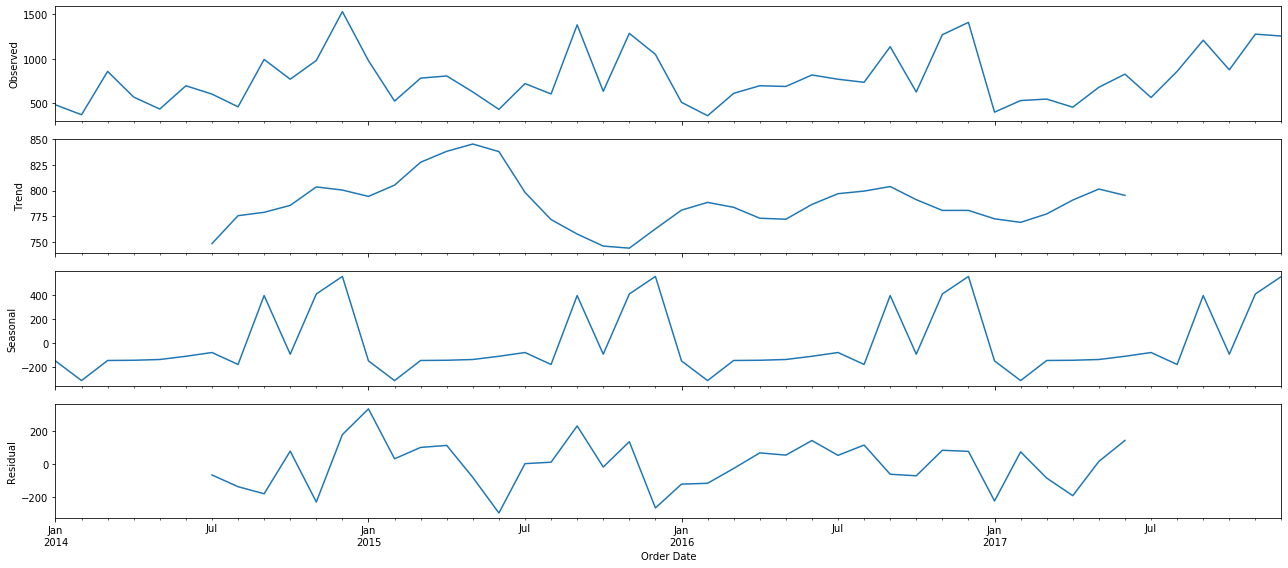

In [20]:
fig = decomposition.plot()
plt.show()

#### ARIMA (AutoRegressive Integrated Moving Average)

ARIMA models are denoted with the notation `ARIMA(p, d, q)`, which account for **seasonality**, **trend**, and **noise** in data.

In [21]:
p = d = q = range(0, 2)

In [22]:
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [23]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Parameter selection using grid search.

In [24]:
options = list()

In [25]:
%%capture
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit(disp=0)
            options.append((param, param_seasonal, results.aic))
        except:
            continue

In [26]:
for param, param_seasonal, results.aic in options:
    print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1505.9648914292864
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309202774
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1187.1804420333194
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758108
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2855.5902127090503
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.5607429809134
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.5784920256078
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2393.1284633010573
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.9884876946868
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1368.9805930012458
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1373.0325849298856
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:64

Find the lowest AIC.

In [27]:
min(options, key = lambda o: o[2])

((1, 1, 1), (1, 1, 0, 12), 297.78754395352644)

Since `SARIMAX (1, 1, 1) x (1, 1, 0, 12)` yields the lowest `AIC`, this should be considered as optimal option.

#### Fit the ARIMA model

In [28]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1),
                               seasonal_order=(1, 1, 0, 12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

In [29]:
results = mod.fit()

In [30]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


Run model diagnostics to investigate any unusual behavior.

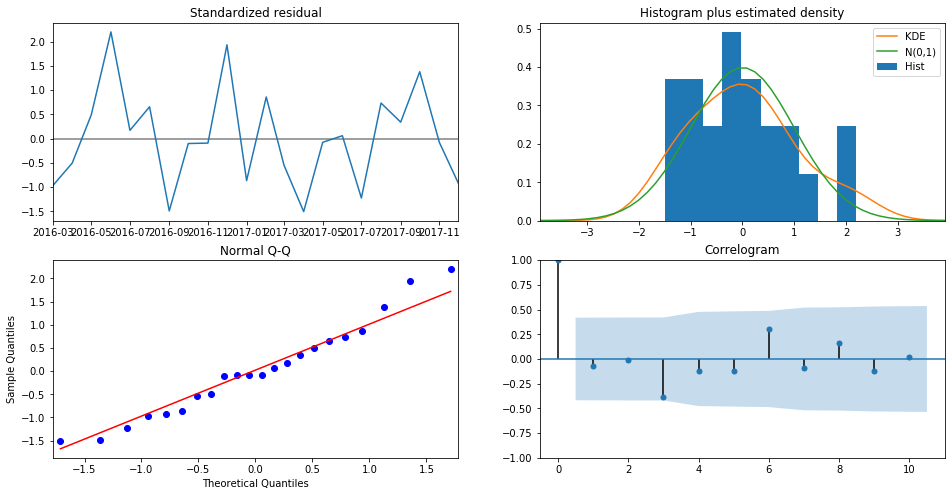

In [31]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Validating forecasts

Compare predicted sales to real sales of the time series (*2017-01-01 to the end*).

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

In [33]:
pred_ci = pred.conf_int()

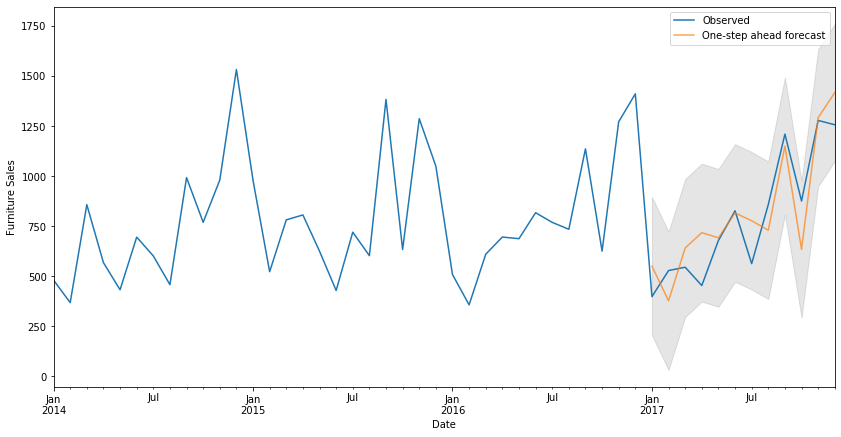

In [34]:
ax  =y['2014':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=0.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=0.1)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

**MSE** and **RMSE** of forecasts

In [35]:
y_forecasted = pred.predicted_mean

In [36]:
y_truth = y['2017-01-01':]

In [37]:
mse = ((y_forecasted - y_truth) ** 2).mean()

In [38]:
print('MSE: {}\nRMSE: {}'.format(round(mse, 2), round(np.sqrt(mse), 2)))

MSE: 22993.57
RMSE: 151.64


#### Producing and visualizing forecasts

In [39]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

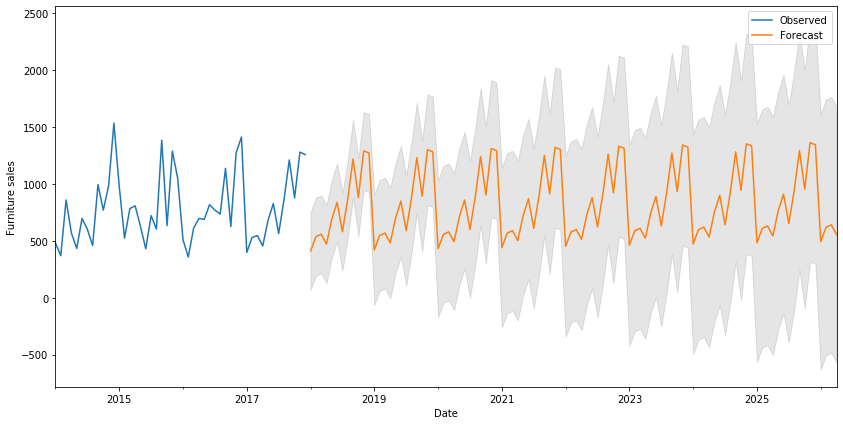

In [40]:
ax = y.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=0.1)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture sales')
plt.legend()
plt.show()